In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import animation

In [2]:
%run   '/home/e20140032223/Bureau/outils.py'

In [3]:
filename = 'HMMA238_TP_leocharoygerard.ipynb'
taille_str = len(filename)
ma_graine = taille_str % 6

In [4]:
Z=[[0,0,0,0,0,0],
   [0,0,0,1,0,0],
   [0,1,0,1,0,0],
   [0,0,1,1,0,0],
   [0,0,0,0,0,0],
   [0,0,0,0,0,0]]


In [5]:
calcul_nb_voisins(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

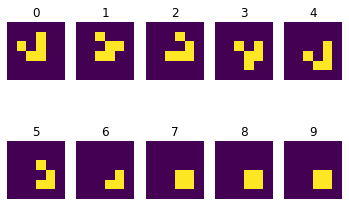

In [6]:
# Appliquons 10 itérations du jeu de la vie à la matrice Z, en convertissant en array entre temps #
Z_copy = np.copy(Z)
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.axis('off')
    plt.imshow(np.array(Z_copy))     # nécessaire pour utiliser imshow
    plt.title(i-1)
    iteration_jeu(Z_copy)

In [7]:
vect = np.array([0,1,0,0,1,1])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])
nb_vect

array([0., 0., 1., 1., 1., 0.])

In [8]:
def calcul_nb_voisins_np(Z):
    n = Z.shape[0]
    p = Z.shape[1] 
    Z_copy = np.copy(Z)
    voisins_ligne = [[0,]*n for i in range(p)]
    voisins_colonne = [[0,]*n for i in range(p)]
    voisins_diagonales = [[0,]*n for i in range(p)]

    
    voisins_ligne = np.array(voisins_ligne)
    voisins_colonne = np.array(voisins_colonne)
    voisins_diagonales = np.array(voisins_diagonales)
    
    for x in range(1,n-1):
        voisins_ligne[x,1:-1] = Z_copy[x,2:]+Z_copy[x,:-2]      # comme vu au dessus
        for y in range(1,p-1):
            voisins_colonne[1:-1,y] = Z_copy[2:,y]+Z_copy[:-2,y]   # identiquement sur les colonnes
            for k in range(1,n-1):
                for l in range(1,p-1):
                        voisins_diagonales[k,l] = voisins_ligne[k-1,l] + voisins_ligne[k+1,l]

           
        
                
                voisinage_complet = voisins_ligne + voisins_colonne + voisins_diagonales
                
        
            
    return voisinage_complet

In [9]:
calcul_nb_voisins_np(np.array(Z))  # maintenant, la fonction prends en compte des objets array.

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 3, 1, 2, 0],
       [0, 1, 5, 3, 3, 0],
       [0, 2, 3, 2, 2, 0],
       [0, 1, 2, 2, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [10]:
def iteration_jeu_np(Z):   
    '''Prends en argument un type array, et renvoie l itération suivante du jeu de la vie sous le même format'''
    n = Z.shape[0]
    p = Z.shape[1]    
    N = calcul_nb_voisins_np(Z)    ## on utilise simplement la fonction précédente
    for x in range(1,n-1):
        for y in range(1,p-1):
            if N[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):    ## les règles sont les mêmes
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

In [11]:
def jeu_np(Z_in, nb_iter) :
    Z_final = Z_in
    for i in range(1,nb_iter):
        Z_final = iteration_jeu_np(Z_in)
        Z_in = Z_final
    return(Z_final)

In [12]:
Z = np.array(Z)
jeu_np(Z,3)
## on travaille donc encore sur des type array

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [14]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
[[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np

AttributeError: 'numpy.ndarray' object has no attribute 'get_zorder'

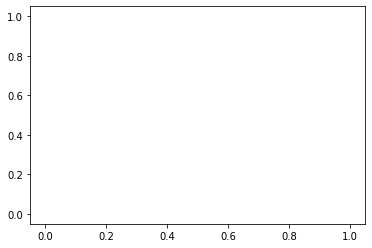

In [18]:
fig = plt.figure()
line, = plt.plot([],[]) 

def init():
    line.set_data([],[])
    return line,

def animate(i):
    im = jeu_np(Z_huge,i)
    return im
    
anim = animation.FuncAnimation(fig, animate,init_func=init, frames=100, blit=True, interval=20, repeat=False)
anim.save('film1.mp4', fps = 60, extra_args=['-vcodec', 'libx264'])
plt.show()

In [ ]:
proportion = (1+ma_graine)*0.1

# Cette proportion est l'espérance visée.
Z_in = np.random.binomial(1, proportion, size=(100,100))
Z_in

In [ ]:
fig2, ax = plt.subplots()
def animate2(i):
    im_normed = jeu_np(Z_in,i)
    ax.imshow(im_normed)
    ax.set_axis_off()
anim = animation.FuncAnimation(fig2, animate2,frames=np.arange(0, 20), interval=50)

anim.save('film2.mp4', fps=60, extra_args=['-vcodec', 'libx264'])
plt.show()

In [ ]:
ruche = np.zeros((50,50))
ruche[21,13:15]=1
ruche[23,13:15]=1
ruche[22,12]=1
ruche[22,15]=1
ruche_copy = np.copy(ruche)
plt.figure(figsize=(20,10))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(np.array(ruche_copy))
    iteration_jeu(ruche_copy)




In [ ]:
clignotant = np.zeros((50,50))
clignotant[7:10,12]=1
clignotant_copy = np.copy(clignotant)
plt.figure(figsize=(20,10))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(np.array(clignotant_copy))
    iteration_jeu(clignotant_copy)

In [ ]:
porte_avion = np.zeros((50,50))
porte_avion[21,24:26]=1
porte_avion[22,25]=1
porte_avion[21,24:25]=1
porte_avion[22:24,22]=1
porte_avion[23,23]=1

porte_avion_copy  = np.copy(porte_avion)
plt.figure(figsize=(20,10))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(np.array(porte_avion_copy))
    iteration_jeu(porte_avion_copy)

In [ ]:
miche = np.zeros((50,50))
miche[20,21:23]=1
miche[21:23,20]=1
miche[23,21]=1
miche[22,22]=1
miche[21,23]=1

miche_copy  = np.copy(miche)
plt.figure(figsize=(20,10))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(np.array(miche_copy))
    iteration_jeu(miche_copy)